<a href="https://colab.research.google.com/github/Vardhan77/DeepLearningWithEVA/blob/master/Project4/s04e03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Third Change in Network , Increasing DropOut to 0.15**

Not much differance in the network. Just increase dropout to 0.15.

Also this increases Accuracy to 99.45% in Val. Accuracy.

Tried many manipulations to the network. 

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras 

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist #The Avengers Assemble

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Loadin the data from mnist folder into a dataframe of training and test images.

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


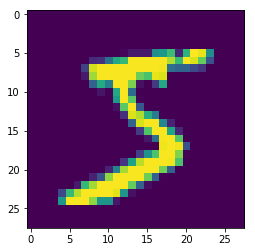

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [29]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [92]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [163]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Convolution2D(18, 3, 3, activation='relu')) #22
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11
# model.add(BatchNormalization())

model.add(Convolution2D(14, 3, 3, activation='relu')) #9
# model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) #7
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #5
# model.add(BatchNormalization())

model.add(Convolution2D(10, 1, 1)) #5



#model.add(Convolution2D(10, 1))

model.add(Convolution2D(10, 5)) 

#model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API

In [164]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_201 (Conv2D)          (None, 26, 26, 18)        180       
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 24, 24, 16)        2608      
_________________________________________________________________
batch_normalization_29 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 22, 22, 18)        2610      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 18)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 9, 9, 14)          2282      
_________________________________________________________________
dropout_31 (Dropout)         (None, 9, 9, 14)          0         
__________

In [165]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=96, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 242us/step - loss: 0.2159 - acc: 0.9317 - val_loss: 0.0699 - val_acc: 0.9754
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 5s 83us/step - loss: 0.0641 - acc: 0.9800 - val_loss: 0.0404 - val_acc: 0.9871
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 5s 84us/step - loss: 0.0483 - acc: 0.9854 - val_loss: 0.0406 - val_acc: 0.9868
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 5s 82us/step - loss: 0.0412 - acc: 0.9874 - val_loss: 0.0286 - val_acc: 0.9905
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [========

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [167]:
print(score)

[0.02438038439529355, 0.993]


In [0]:
y_pred = model.predict(X_test)

In [117]:
print(y_pred[:9])
print(y_test[:9])

[[4.71116581e-13 3.55587296e-11 6.95700372e-11 7.87752762e-12
  4.78604684e-14 3.57684932e-12 4.29365707e-21 1.00000000e+00
  1.43774348e-12 3.16612048e-09]
 [5.21417114e-08 2.02311252e-08 9.99999881e-01 1.45672415e-11
  2.72229740e-15 4.07654189e-14 1.14329679e-09 6.02137535e-13
  2.35002173e-09 4.97901755e-14]
 [7.20550342e-10 9.99994874e-01 1.07356630e-08 7.55185081e-10
  1.08235997e-06 2.63498166e-08 1.60140416e-08 4.00821909e-06
  3.71167497e-09 5.09248976e-10]
 [9.99986172e-01 7.40130342e-13 2.58614987e-11 6.45931225e-13
  4.29362129e-10 1.08918456e-08 1.38386640e-05 1.17955585e-11
  1.12195364e-08 4.38566516e-08]
 [6.23730559e-13 2.92342929e-12 2.06992631e-10 4.15891695e-15
  1.00000000e+00 1.96798591e-13 9.57421809e-10 1.48021917e-09
  1.60746161e-09 1.20848673e-08]
 [5.32084599e-10 9.99989390e-01 4.99831501e-08 5.46664016e-12
  3.11130236e-07 7.06772918e-10 1.68864411e-09 1.02715585e-05
  8.99116837e-10 1.02122151e-10]
 [1.46422107e-15 3.39015771e-09 6.83223718e-08 5.15260611e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

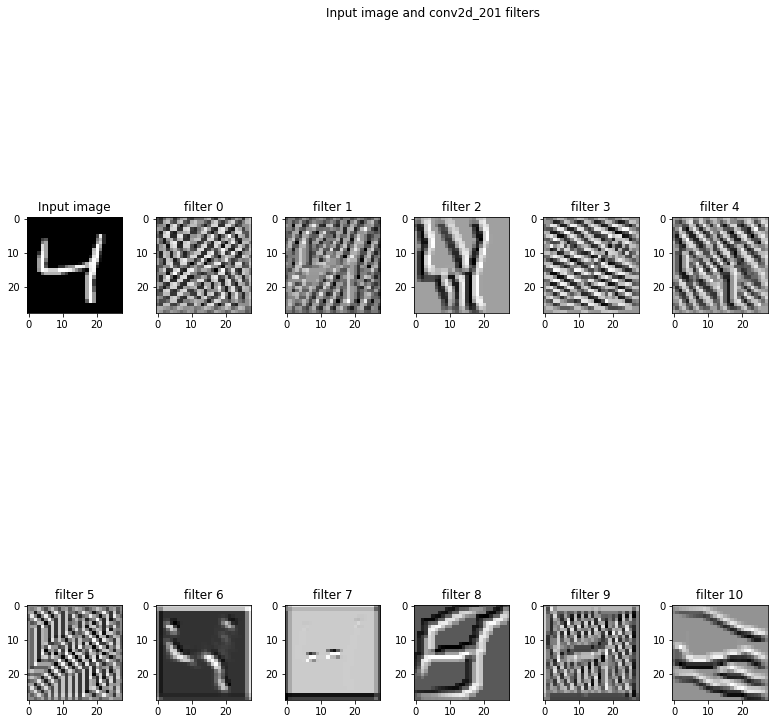

In [171]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_201'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# 1st Try :

1st change was to add Batch Normalization.
Also getting the number of parameters back to less than 15k.

Observation:
 Accuracy increases to 99.2%
 notice differance between the training acc and the val acc is 0.3%
 

